<font size=6>The Billboard Hot 100<br><font size=3 color=lightgrey> by Chris Cherewka, Shashank Sheth and Warren Elson</font>
---

In [14]:
# import sys
# !{sys.executable} -m pip install spotipy

In [100]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
from config import USER_ID, CLIENT_ID, CLIENT_SECRET
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import warnings
import math
import time
warnings.simplefilter("ignore")

In [16]:
sp = spotipy.Spotify()

TOP10_PLAYLIST_ID = "1ggWDL88pSeijtf7zifvF1"
ALBUMS_PLAYLIST_ID = "5YVVRDq8QLSB2wJ2lvq3Dx"
CLIENT_CREDENTIALS = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET) 

sp = spotipy.Spotify(client_credentials_manager=CLIENT_CREDENTIALS) 
sp.trace=False

---
## Extract & Transform

In [17]:
# First we have to gather the total number of tracks in the playlist 
track_count = sp.user_playlist_tracks(USER_ID, TOP10_PLAYLIST_ID, 'total')['total']

# Then we calculate the number of times we'll have to call the API
iterations = math.ceil(track_count/100)

# Finally we begin our loop
attributes_df = pd.DataFrame()
information_df = pd.DataFrame()
for i in range(iterations):
    a = (i*100)+1
    z = (i+1)*100
    print(f"Compiling songs {a} through {z if z < track_count else track_count} of {track_count}")
    playlist = sp.user_playlist_tracks(USER_ID, TOP10_PLAYLIST_ID, None, None, i*100) # documentation - https://spotipy.readthedocs.io/en/2.13.0/
    songs = playlist["items"]

    track_ids = []
    track_names = []
    track_popularities = []
    track_explicit = []
    artist_ids = []
    artist_names = []
    artist_popularities = []
    artist_followers = []
    artist_genres = []
    
    for j in range(len(songs)): 
        track_ids.append(songs[j]["track"]["id"])
        track_names.append(songs[j]["track"]["name"])
        track_popularities.append(songs[j]["track"]["popularity"])
        track_explicit.append(songs[j]["track"]["explicit"])
        artist_names.append(songs[j]["track"]["artists"][0]["name"])
        
        artist_id = songs[j]["track"]["artists"][0]["id"]
        artist_ids.append(artist_id)
        artist = sp.artist(artist_id)
        artist_popularities.append(artist['popularity'])
        artist_followers.append(artist['followers']['total'])
        artist_genres.append(artist['genres'])

        
    features = sp.audio_features(track_ids)
    att_df = pd.DataFrame(features)
    info_df = pd.DataFrame({"song_id":track_ids, 
                            "song_name":track_names, 
                            "song_popularity":track_popularities,
                            "explicit":track_explicit,
                            "artist_id":artist_ids, 
                            "artist": artist_names, 
                            "artist popularity": artist_popularities,
                            "artist followers": artist_followers,
                            "genre": artist_genres})
    
    attributes_df = attributes_df.append(att_df, ignore_index=True)
    information_df = information_df.append(info_df, ignore_index=True)
#     time.sleep(1) # incase this is necessary on larger playlists

TOP_df = information_df.merge(attributes_df, left_on="song_id", right_on="id")
TOP_df["top_10"] = 1
print("-"*40,"\nComplete")
# TOP_df

Compiling songs 1 through 100 of 200
Compiling songs 101 through 200 of 200
---------------------------------------- 
Complete


In [18]:
# And again...
track_count = sp.user_playlist_tracks(USER_ID, ALBUMS_PLAYLIST_ID, 'total')['total']
iterations = math.ceil(track_count/100)
attributes_df = pd.DataFrame()
information_df = pd.DataFrame()

for i in range(iterations):
    a = (i*100)+1
    z = (i+1)*100
    print(f"Compiling songs {a} through {z if z < track_count else track_count} of {track_count}")
    playlist = sp.user_playlist_tracks(USER_ID, ALBUMS_PLAYLIST_ID, None, None, i*100) # documentation - https://spotipy.readthedocs.io/en/2.13.0/
    songs = playlist["items"]

    track_ids = []
    track_names = []
    track_popularities = []
    track_explicit = []
    artist_ids = []
    artist_names = []
    artist_popularities = []
    artist_followers = []
    artist_genres = []
    
    for j in range(len(songs)): 
        track_ids.append(songs[j]["track"]["id"])
        track_names.append(songs[j]["track"]["name"])
        track_popularities.append(songs[j]["track"]["popularity"])
        track_explicit.append(songs[j]["track"]["explicit"])
        artist_names.append(songs[j]["track"]["artists"][0]["name"])
        
        artist_id = songs[j]["track"]["artists"][0]["id"]
        artist_ids.append(artist_id)
        artist = sp.artist(artist_id)
        artist_popularities.append(artist['popularity'])
        artist_followers.append(artist['followers']['total'])
        artist_genres.append(artist['genres'])

        
    features = sp.audio_features(track_ids)
    att_df = pd.DataFrame(features)
    info_df = pd.DataFrame({"song_id":track_ids, 
                            "song_name":track_names, 
                            "song_popularity":track_popularities,
                            "explicit":track_explicit,
                            "artist_id":artist_ids, 
                            "artist": artist_names, 
                            "artist popularity": artist_popularities,
                            "artist followers": artist_followers,
                            "genre": artist_genres})
    
    attributes_df = attributes_df.append(att_df, ignore_index=True)
    information_df = information_df.append(info_df, ignore_index=True)
#     time.sleep(1) # incase this is necessary on larger playlists

ALBUMS_df = information_df.merge(attributes_df, left_on="song_id", right_on="id")
ALBUMS_df["top_10"] = 0
print("-"*40,"\nComplete")
# ALBUMS_df

Compiling songs 1 through 100 of 2330
Compiling songs 101 through 200 of 2330
Compiling songs 201 through 300 of 2330
Compiling songs 301 through 400 of 2330
Compiling songs 401 through 500 of 2330
Compiling songs 501 through 600 of 2330
Compiling songs 601 through 700 of 2330
Compiling songs 701 through 800 of 2330
Compiling songs 801 through 900 of 2330
Compiling songs 901 through 1000 of 2330
Compiling songs 1001 through 1100 of 2330
Compiling songs 1101 through 1200 of 2330
Compiling songs 1201 through 1300 of 2330
Compiling songs 1301 through 1400 of 2330
Compiling songs 1401 through 1500 of 2330
Compiling songs 1501 through 1600 of 2330
Compiling songs 1601 through 1700 of 2330
Compiling songs 1701 through 1800 of 2330
Compiling songs 1801 through 1900 of 2330
Compiling songs 1901 through 2000 of 2330
Compiling songs 2001 through 2100 of 2330
Compiling songs 2101 through 2200 of 2330
Compiling songs 2201 through 2300 of 2330
Compiling songs 2301 through 2330 of 2330
-------------

In [19]:
# Append our Album tracks to our Top 10 tracks
FULL_df = TOP_df.append(ALBUMS_df, ignore_index=True)
# Drop the Top tracks which were in the Albums dataframe (should drop exactly 200)
FULL_df.drop_duplicates(["song_id"], inplace=True)
# Reset the index
FULL_df.reset_index(inplace=True, drop=True)

# We realized the day of the presentation that using encoding only fixes half of the issue, 
# and what we really need to use is OneHot in order to process the categorical data, 
# but our computers never finish running with all of those columns 
# so we'll save that for another day...
# # Encode Strings in "Artist Column"
# from sklearn.preprocessing import LabelEncoder
# encode = LabelEncoder()
# FULL_df['artist_id'] = encode.fit_transform(FULL_df['artist_id'])

# FULL_df

,song_id,song_name,song_popularity,explicit,artist_id,artist,artist popularity,artist followers,genre,danceability,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,top_10
0,3y4LxiYMgDl4RethdzpmNe,Breathe,65,False,25NQNriVT2YbSW80ILRWJa,Faith Hill,67,1137406,"[contemporary country, country, country dawn, ...",0.529,...,0.278,136.859,audio_features,3y4LxiYMgDl4RethdzpmNe,spotify:track:3y4LxiYMgDl4RethdzpmNe,https://api.spotify.com/v1/tracks/3y4LxiYMgDl4...,https://api.spotify.com/v1/audio-analysis/3y4L...,250547,4,1
1,3i3GeK0qLQybu4ah42YmCY,Smooth (feat. Rob Thomas),54,False,6GI52t8N5F02MxU0g5U69P,Santana,73,1620470,"[blues rock, classic rock, mexican classic rock]",0.612,...,0.960,115.953,audio_features,3i3GeK0qLQybu4ah42YmCY,spotify:track:3i3GeK0qLQybu4ah42YmCY,https://api.spotify.com/v1/tracks/3i3GeK0qLQyb...,https://api.spotify.com/v1/audio-analysis/3i3G...,295987,4,1
2,3fucYASejkSMwtAYjFRKlF,Maria Maria (feat. The Product G&B),53,False,6GI52t8N5F02MxU0g5U69P,Santana,73,1620470,"[blues rock, classic rock, mexican classic rock]",0.779,...,0.663,97.927,audio_features,3fucYASejkSMwtAYjFRKlF,spotify:track:3fucYASejkSMwtAYjFRKlF,https://api.spotify.com/v1/tracks/3fucYASejkSM...,https://api.spotify.com/v1/audio-analysis/3fuc...,262160,4,1
3,6ctr1K7KzKErxbfGAynL8A,I Wanna Know,57,False,3zTOe1BtyTkwNvYZOxXktX,Joe,67,1041564,"[dance pop, hip pop, neo soul, new jack swing,...",0.724,...,0.581,136.057,audio_features,6ctr1K7KzKErxbfGAynL8A,spotify:track:6ctr1K7KzKErxbfGAynL8A,https://api.spotify.com/v1/tracks/6ctr1K7KzKEr...,https://api.spotify.com/v1/audio-analysis/6ctr...,296800,4,1
4,4cKGldbhGJniI8BrB3K6tb,Everything You Want,64,False,6Hizgjo92FnMp8wGaRUNTn,Vertical Horizon,55,280874,"[neo mellow, pop rock, post-grunge]",0.637,...,0.741,93.898,audio_features,4cKGldbhGJniI8BrB3K6tb,spotify:track:4cKGldbhGJniI8BrB3K6tb,https://api.spotify.com/v1/tracks/4cKGldbhGJni...,https://api.spotify.com/v1/audio-analysis/4cKG...,257067,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325,5MoU7TaAvgBa8W0XVwXAd7,Trust,54,False,7gOdHgIoIKoe4i9Tta6qdD,Jonas Brothers,83,4325374,"[boy band, dance pop, pop, pop rock, post-teen...",0.806,...,0.671,146.041,audio_features,5MoU7TaAvgBa8W0XVwXAd7,spotify:track:5MoU7TaAvgBa8W0XVwXAd7,https://api.spotify.com/v1/tracks/5MoU7TaAvgBa...,https://api.spotify.com/v1/audio-analysis/5MoU...,180600,3,0
2326,5md87aD3pGXRghKUbZdyh8,Strangers,58,False,7gOdHgIoIKoe4i9Tta6qdD,Jonas Brothers,83,4325374,"[boy band, dance pop, pop, pop rock, post-teen...",0.594,...,0.573,129.986,audio_features,5md87aD3pGXRghKUbZdyh8,spotify:track:5md87aD3pGXRghKUbZdyh8,https://api.spotify.com/v1/tracks/5md87aD3pGXR...,https://api.spotify.com/v1/audio-analysis/5md8...,233853,4,0
2327,7fiFJADUcHwTdYLmnZeLAy,Hesitate,62,False,7gOdHgIoIKoe4i9Tta6qdD,Jonas Brothers,83,4325374,"[boy band, dance pop, pop, pop rock, post-teen...",0.622,...,0.236,118.051,audio_features,7fiFJADUcHwTdYLmnZeLAy,spotify:track:7fiFJADUcHwTdYLmnZeLAy,https://api.spotify.com/v1/tracks/7fiFJADUcHwT...,https://api.spotify.com/v1/audio-analysis/7fiF...,208840,4,0
2328,7dxKdQC9Vo1hDxIUnt1z0Q,Rollercoaster,66,False,7gOdHgIoIKoe4i9Tta6qdD,Jonas Brothers,83,4325374,"[boy band, dance pop, pop, pop rock, post-teen...",0.697,...,0.467,123.977,audio_features,7dxKdQC9Vo1hDxIUnt1z0Q,spotify:track:7dxKdQC9Vo1hDxIUnt1z0Q,https://api.spotify.com/v1/tracks/7dxKdQC9Vo1h...,https://api.spotify.com/v1/audio-analysis/7dxK...,181813,4,0


In [135]:
# Let's take a look at what genres appear the most
allGenres = FULL_df["genre"].explode()
allGenres.value_counts().to_csv("genre_count.csv")
allGenres.value_counts().head(50)

pop                       1472
dance pop                 1171
pop rap                    592
post-teen pop              569
pop rock                   454
rap                        452
urban contemporary         443
r&b                        372
hip pop                    302
hip hop                    294
neo mellow                 236
southern hip hop           174
post-grunge                160
atl hip hop                148
trap                       123
neo soul                   123
canadian pop               110
electropop                 110
uk pop                     100
alternative metal           96
gangster rap                85
rock                        77
talent show                 75
nu metal                    74
edm                         73
queens hip hop              69
south carolina hip hop      66
modern rock                 66
europop                     65
dirty south rap             64
pop punk                    64
contemporary country        63
boy band

In [21]:
#Adding columns for the most common genres and grouping in their subgenres

pop = [0]*len(FULL_df.index)
rap = [0]*len(FULL_df.index)
rnb = [0]*len(FULL_df.index)
edm = [0]*len(FULL_df.index)
rock = [0]*len(FULL_df.index)
latin = [0]*len(FULL_df.index)
hiphop = [0]*len(FULL_df.index)
mellow = [0]*len(FULL_df.index)
country = [0]*len(FULL_df.index)

for i in range(len(FULL_df["genre"])):
    for item in FULL_df["genre"][i]:

        if (("edm" in item) or 
            ("dance" in item) or 
            ("vapor" in item) or 
            ("techno" in item) or 
            ("electro" in item) or 
            ("brostep" in item) or 
            ("complextro" in item))\
        and (("dancehall" not in item) and
             ("dance pop" not in item)):
            edm[i]=1
            
        if (("rock" in item) or 
            ("punk" in item) or
            ("metal" in item) or
            ("indie" in item) or
            ("grunge" in item) or
            ("baroque" in item) or
            ("permanent wave" in item)):
            rock[i]=1

        if ("pop" in item)\
        and (("punk" not in item) and 
             ("rock" not in item) and 
             ("baroque" not in item) and 
             ("dance pop" not in item) and 
             ("indie poptimism" not in item)):
            pop[i]=1
            
        if (("hip" in item) or 
            ("hop" in item) or 
            ("dancehall" in item) or 
            ("new jack swing" in item)):
            hiphop[i]=1
            
        if (("r&b"in item) or
            ("soul"in item) or
            ("motown"in item) or
            ("quiet storm" in item)):
            rnb[i]=1

        if (("rap" in item) or 
            ("urban" in item))\
        and ("vapor" not in item):
            rap[i]=1
            
        if (("country"in item) or
            ("lilith" in item)):
            country[i]=1

        if "mellow" in item:
            mellow[i]=1
            
        if "latin" in item:
            latin[i]=1

# In order of most appearing (done in excel)   
FULL_df["pop"] = pop
FULL_df["rap"] = rap
FULL_df["hiphop"] = hiphop
FULL_df["rock"] = rock
FULL_df["rnb"] = rnb
FULL_df["country"] = country
FULL_df["mellow"] = mellow
FULL_df["edm"] = edm
FULL_df["latin"] = latin
FULL_df.head(3)

,song_id,song_name,song_popularity,explicit,artist_id,artist,artist popularity,artist followers,genre,danceability,...,top_10,pop,rap,hiphop,rock,rnb,country,mellow,edm,latin
0,3y4LxiYMgDl4RethdzpmNe,Breathe,65,False,25NQNriVT2YbSW80ILRWJa,Faith Hill,67,1137406,"[contemporary country, country, country dawn, ...",0.529,...,1,0,0,0,1,0,1,0,0,0
1,3i3GeK0qLQybu4ah42YmCY,Smooth (feat. Rob Thomas),54,False,6GI52t8N5F02MxU0g5U69P,Santana,73,1620470,"[blues rock, classic rock, mexican classic rock]",0.612,...,1,0,0,0,1,0,0,0,0,0
2,3fucYASejkSMwtAYjFRKlF,Maria Maria (feat. The Product G&B),53,False,6GI52t8N5F02MxU0g5U69P,Santana,73,1620470,"[blues rock, classic rock, mexican classic rock]",0.779,...,1,0,0,0,1,0,0,0,0,0


---
# The Top 10 Songs of the 2000's - <font color=teal>Prediction

In [167]:
# Assign X (data matrix) and y (target)
X = FULL_df.drop(['song_id', 'song_name', 'artist_id', 'artist', 'genre', 
                  'type', 'id', 'uri', 'track_href', 'analysis_url',
                  'top_10'], axis=1)
# X = X.drop(['artist popularity', 'artist followers'], axis=1)
# X = X.drop(['song_popularity'], axis=1)
y = FULL_df['top_10']
print(f"Data: {X.shape} | Target: {y.shape}")

# Name our negatives and positives
target_names = ["Average Songs", "Top 10 Hits"]

# Select a random state for Notebook
rs = 42

#Split data into training (75%) and testing (25%) subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rs, stratify=y) # stratify for imbalanced data

Data: (2330, 26) | Target: (2330,)


### <font color=grey>~~Logistic Regression~~</font> (poor results)

Training Data Score: 0.9141385231825987
Testing Data Score: 0.9142367066895368

               precision    recall  f1-score   support

Average Songs       0.91      1.00      0.96       533
  Top 10 Hits       0.00      0.00      0.00        50

     accuracy                           0.91       583
    macro avg       0.46      0.50      0.48       583
 weighted avg       0.84      0.91      0.87       583



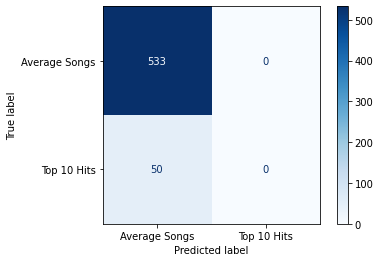

In [173]:
#create model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
# classifier = LogisticRegression(class_weight = 'balanced')
# classifier = LogisticRegression(class_weight = {0:1, 1:10})
# classifier = LogisticRegression(class_weight = {0:1, 1:11})

#train model
classifier.fit(X_train, y_train)

#test model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}\n")

# Calculate classification report
from sklearn.metrics import classification_report
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions, target_names=target_names))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, display_labels=target_names)
plt.show()

### Decision Tree (pessimistic)

Training Data Score: 1.0
Testing Data Score: 0.909

               precision    recall  f1-score   support

Average Songs       0.94      0.96      0.95       533
  Top 10 Hits       0.46      0.38      0.42        50

     accuracy                           0.91       583
    macro avg       0.70      0.67      0.68       583
 weighted avg       0.90      0.91      0.90       583



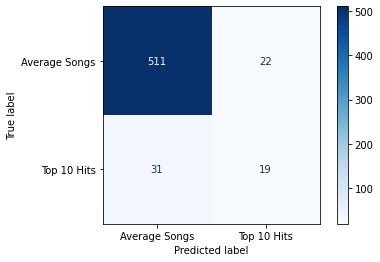

In [159]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(class_weight = 'balanced')

#train model
clf = clf.fit(X_train, y_train)

#test model
print(f"Training Data Score: {clf.score(X_train, y_train)}")
print(f"Testing Data Score: {round(clf.score(X_test, y_test),3)}\n")

from sklearn.metrics import classification_report
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions, target_names=target_names))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, display_labels=target_names)
plt.show()

# feature_names = X.columns
# sorted(zip(clf.feature_importances_, feature_names), reverse=True)[:10]

### Random Forest (extremely pessimistic)

Training Data Score: 0.9994275901545506
Testing Data Score: 0.925

               precision    recall  f1-score   support

Average Songs       0.93      1.00      0.96       533
  Top 10 Hits       0.88      0.14      0.24        50

     accuracy                           0.92       583
    macro avg       0.90      0.57      0.60       583
 weighted avg       0.92      0.92      0.90       583



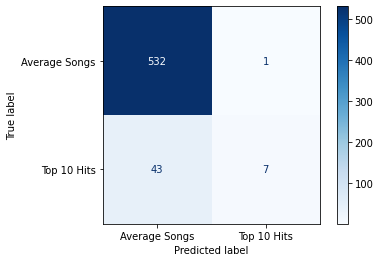

In [161]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, class_weight = 'balanced')

#train model
rf = rf.fit(X_train, y_train)

#test model
print(f"Training Data Score: {rf.score(X_train, y_train)}")
print(f"Testing Data Score: {round(rf.score(X_test, y_test),3)}\n")

predictions = rf.predict(X_test)
print(classification_report(y_test, predictions, target_names=target_names))

plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues, display_labels=target_names)
plt.show()

# feature_names = X.columns
# sorted(zip(rf.feature_importances_, feature_names), reverse=True)[:10]

### <font color=grey>~~k-Nearest Neighbors (kNN)~~</font>  (doesn't take in class weights)

k: 1, Train/Test Score: 1.000/0.861
k: 3, Train/Test Score: 0.929/0.904
k: 5, Train/Test Score: 0.924/0.913
k: 7, Train/Test Score: 0.918/0.916
k: 9, Train/Test Score: 0.918/0.914
k: 11, Train/Test Score: 0.917/0.914
k: 13, Train/Test Score: 0.914/0.914
k: 15, Train/Test Score: 0.915/0.914
k: 17, Train/Test Score: 0.915/0.914
k: 19, Train/Test Score: 0.915/0.914


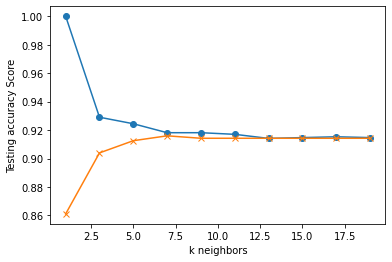

In [32]:
# PART 1

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

Training Data Score: 0.9244419004006869
Testing Data Score: 0.9125214408233276

               precision    recall  f1-score   support

Average Songs       0.91      1.00      0.96       533
  Top 10 Hits       0.00      0.00      0.00        50

     accuracy                           0.91       583
    macro avg       0.46      0.50      0.48       583
 weighted avg       0.84      0.91      0.87       583



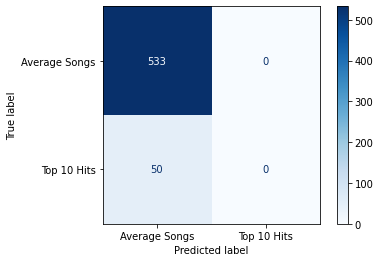

[(0.26188741178950037, 'song_popularity'),
 (0.06643506917929197, 'danceability'),
 (0.06073472631955752, 'valence'),
 (0.059643004937276076, 'speechiness'),
 (0.05945150529224487, 'artist popularity'),
 (0.05761472221300651, 'artist followers'),
 (0.051638949867101214, 'liveness'),
 (0.051151764222678434, 'loudness'),
 (0.05099223430312865, 'acousticness'),
 (0.05085025903258534, 'energy'),
 (0.050091984338919045, 'duration_ms'),
 (0.04786634642485802, 'tempo'),
 (0.03176477647998531, 'key'),
 (0.029693441586464843, 'instrumentalness'),
 (0.008917677205268735, 'mode'),
 (0.008282629286481344, 'pop'),
 (0.007358954800287251, 'rap'),
 (0.0071424119029381995, 'rnb'),
 (0.006787198756593677, 'mellow'),
 (0.006226270309592533, 'hiphop'),
 (0.006181650564818629, 'explicit'),
 (0.005484976178282009, 'edm'),
 (0.005450848074667011, 'rock'),
 (0.0034609313078273985, 'country'),
 (0.003163031636239668, 'time_signature'),
 (0.0017272239904051678, 'latin')]

In [33]:
# PART 2

# Note that k: 5 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

#test model
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}\n")

predictions = knn.predict(X_test)
print(classification_report(y_test, predictions, target_names=target_names))

plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues, display_labels=target_names)
plt.show()

feature_names = X.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

### Support Vector Machine (SVM) ***(optimistic)***

Training Data Score: 0.7887807670291929
Testing Data Score: 0.8164665523156089

               precision    recall  f1-score   support

Average Songs       0.97      0.83      0.89       533
  Top 10 Hits       0.28      0.72      0.40        50

     accuracy                           0.82       583
    macro avg       0.62      0.77      0.65       583
 weighted avg       0.91      0.82      0.85       583



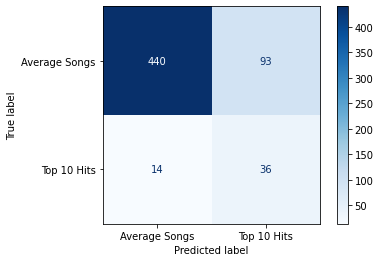

In [162]:
from sklearn.svm import SVC 

model = SVC(kernel='linear', class_weight='balanced')

# Create a StandardScaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#train model
model.fit(X_train_scaled, y_train)

#test model
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}\n")

predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions, target_names=target_names))

plot_confusion_matrix(model, X_test_scaled, y_test, cmap=plt.cm.Blues, display_labels=target_names)
plt.show()

### GridSearchCV (optomized for score, not ideal for us)

In [81]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
# Ref: www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf
param_grid = {'C': [2**n for n in range(-5,8)], 
              'gamma': [2**n for n in range(-15,4)],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

# model = SVC(class_weight='balanced')
model = SVC(class_weight={0:1, 1:12})
grid = GridSearchCV(model, param_grid, verbose=5, cv=5, n_jobs=2)

# Fit the model using the grid search estimator. 
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 988 candidates, totalling 4940 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    4.1s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    7.7s
[Parallel(n_jobs=2)]: Done 246 tasks      | elapsed:   17.6s
[Parallel(n_jobs=2)]: Done 498 tasks      | elapsed:   32.9s
[Parallel(n_jobs=2)]: Done 822 tasks      | elapsed:   50.6s
[Parallel(n_jobs=2)]: Done 1218 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done 1686 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 2226 tasks      | elapsed:  2.3min
[Parallel(n_jobs=2)]: Done 2838 tasks      | elapsed:  3.3min
[Parallel(n_jobs=2)]: Done 3286 tasks      | elapsed:  4.8min
[Parallel(n_jobs=2)]: Done 3664 tasks      | elapsed:  6.7min
[Parallel(n_jobs=2)]: Done 4078 tasks      | elapsed: 10.5min
[Parallel(n_jobs=2)]: Done 4528 tasks      | elapsed: 18.5min
[Parallel(n_jobs=2)]: Done 4940 out of 4940 | elapsed: 32.9min finished


GridSearchCV(cv=5, estimator=SVC(class_weight={0: 1, 1: 12}, kernel='linear'),
             n_jobs=2,
             param_grid={'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,
                               16, 32, 64, 128],
                         'gamma': [3.0517578125e-05, 6.103515625e-05,
                                   0.0001220703125, 0.000244140625,
                                   0.00048828125, 0.0009765625, 0.001953125,
                                   0.00390625, 0.0078125, 0.015625, 0.03125,
                                   0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=5)

The best params were {'C': 8, 'gamma': 0.125, 'kernel': 'rbf'} with a score of 0.916.
               precision    recall  f1-score   support

Average Songs       0.92      0.97      0.95       533
  Top 10 Hits       0.22      0.08      0.12        50

     accuracy                           0.90       583
    macro avg       0.57      0.53      0.53       583
 weighted avg       0.86      0.90      0.87       583



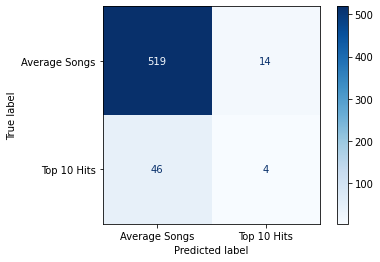

In [82]:
# List the best parameters for this dataset
print(f"The best params were {grid.best_params_} with a score of {round(grid.best_score_,3)}.")

# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)

# Calculate classification report
print(classification_report(y_test, predictions, target_names=target_names))

plot_confusion_matrix(grid, X_test_scaled, y_test, cmap=plt.cm.Blues, display_labels=target_names)
plt.show()

---

---
# Spotify's Top 25 Most Popular Artists of 2020 - <font color=teal>Artist Classification</font>

In [92]:
# New Playlist ID
ARTISTS_PLAYLIST_ID = "1tAFPRhQIgotmMl2eNTZwb"

# First we have to gather the total number of tracks in the playlist 
track_count = sp.user_playlist_tracks(USER_ID, ARTISTS_PLAYLIST_ID, 'total')['total']

# Then we calculate the number of times we'll have to call the API
iterations = math.ceil(track_count/100)

# Finally we begin our loop
attributes_df = pd.DataFrame()
information_df = pd.DataFrame()
for i in range(iterations):
    a = (i*100)+1
    z = (i+1)*100
    print(f"Compiling songs {a} through {z if z < track_count else track_count} of {track_count}")
    playlist = sp.user_playlist_tracks(USER_ID, ARTISTS_PLAYLIST_ID, None, None, i*100) # documentation - https://spotipy.readthedocs.io/en/2.13.0/
    songs = playlist["items"]
#     time.sleep(5) # incase this is necessary on larger playlists

    track_ids = []
    track_names = []
    track_popularities = []
    track_explicit = []
    artist_ids = []
    artist_names = []
    artist_popularities = []
    artist_followers = []
    artist_genres = []
    
    for j in range(len(songs)): 
        track_ids.append(songs[j]["track"]["id"])
        track_names.append(songs[j]["track"]["name"])
        track_popularities.append(songs[j]["track"]["popularity"])
        track_explicit.append(songs[j]["track"]["explicit"])
        artist_names.append(songs[j]["track"]["artists"][0]["name"])
        
        artist_id = songs[j]["track"]["artists"][0]["id"]
        artist_ids.append(artist_id)
        artist = sp.artist(artist_id)
        artist_popularities.append(artist['popularity'])
        artist_followers.append(artist['followers']['total'])
        artist_genres.append(artist['genres'])

        
    features = sp.audio_features(track_ids)
    att_df = pd.DataFrame(features)
    info_df = pd.DataFrame({"song_id":track_ids, 
                            "song_name":track_names, 
                            "song_popularity":track_popularities,
                            "explicit":track_explicit,
                            "artist_id":artist_ids, 
                            "artist": artist_names, 
                            "artist popularity": artist_popularities,
                            "artist followers": artist_followers,
                            "genre": artist_genres})
    
    attributes_df = attributes_df.append(att_df, ignore_index=True)
    information_df = information_df.append(info_df, ignore_index=True)

ARTISTS_df = information_df.merge(attributes_df, left_on="song_id", right_on="id")
ARTISTS_df = ARTISTS_df.drop_duplicates(['song_id'])
ARTISTS_df.reset_index(inplace=True, drop=True)
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
ARTISTS_df['song_encoded'] = encode.fit_transform(ARTISTS_df['song_id'])
print("-"*40,"\nComplete")

pop = [0]*len(ARTISTS_df.index)
rap = [0]*len(ARTISTS_df.index)
rnb = [0]*len(ARTISTS_df.index)
edm = [0]*len(ARTISTS_df.index)
rock = [0]*len(ARTISTS_df.index)
latin = [0]*len(ARTISTS_df.index)
hiphop = [0]*len(ARTISTS_df.index)
mellow = [0]*len(ARTISTS_df.index)
country = [0]*len(ARTISTS_df.index)

for i in range(len(ARTISTS_df["genre"])):
    for item in ARTISTS_df["genre"][i]:
        if (("edm" in item) or ("dance" in item) or ("vapor" in item) or ("techno" in item) or ("electro" in item) or ("brostep" in item) or ("complextro" in item)) and (("dancehall" not in item) and ("dance pop" not in item)):
            edm[i]=1
        if (("rock" in item) or ("punk" in item) or ("metal" in item) or ("indie" in item) or ("grunge" in item) or ("baroque" in item) or ("permanent wave" in item)):
            rock[i]=1
        if ("pop" in item) and (("punk" not in item) and ("rock" not in item) and ("baroque" not in item) and ("dance pop" not in item) and ("indie poptimism" not in item)):
            pop[i]=1
        if (("hip" in item) or ("hop" in item) or ("dancehall" in item) or ("new jack swing" in item)):
            hiphop[i]=1
        if (("r&b"in item) or ("soul"in item) or ("motown"in item) or ("quiet storm" in item)):
            rnb[i]=1
        if (("rap" in item) or ("urban" in item)) and ("vapor" not in item):
            rap[i]=1
        if (("country"in item) or ("lilith" in item)):
            country[i]=1
        if "mellow" in item:
            mellow[i]=1
        if "latin" in item:
            latin[i]=1

ARTISTS_df["pop"] = pop
ARTISTS_df["rap"] = rap
ARTISTS_df["hiphop"] = hiphop
ARTISTS_df["rock"] = rock
ARTISTS_df["rnb"] = rnb
ARTISTS_df["country"] = country
ARTISTS_df["mellow"] = mellow
ARTISTS_df["edm"] = edm
ARTISTS_df["latin"] = latin

ARTISTS_df.head(3)

Compiling songs 1 through 100 of 1623
Compiling songs 101 through 200 of 1623
Compiling songs 201 through 300 of 1623
Compiling songs 301 through 400 of 1623
Compiling songs 401 through 500 of 1623
Compiling songs 501 through 600 of 1623
Compiling songs 601 through 700 of 1623
Compiling songs 701 through 800 of 1623
Compiling songs 801 through 900 of 1623
Compiling songs 901 through 1000 of 1623
Compiling songs 1001 through 1100 of 1623
Compiling songs 1101 through 1200 of 1623
Compiling songs 1201 through 1300 of 1623
Compiling songs 1301 through 1400 of 1623
Compiling songs 1401 through 1500 of 1623
Compiling songs 1501 through 1600 of 1623
Compiling songs 1601 through 1623 of 1623
---------------------------------------- 
Complete


,song_id,song_name,song_popularity,explicit,artist_id,artist,artist popularity,artist followers,genre,danceability,...,song_encoded,pop,rap,hiphop,rock,rnb,country,mellow,edm,latin
0,1XpYodsD36XN7ygcdF7mJJ,The A Team,66,False,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,92,67042745,"[pop, uk pop]",0.642,...,320,1,0,0,0,0,0,0,0,0
1,4RnCPWlBsY7oUDdyruod7Y,Drunk,64,False,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,92,67042745,"[pop, uk pop]",0.733,...,920,1,0,0,0,0,0,0,0,0
2,5Ukzlujip1Slqka5OY82YS,U.N.I.,55,False,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,92,67042745,"[pop, uk pop]",0.422,...,1141,1,0,0,0,0,0,0,0,0


In [93]:
ARTISTS_df['artist'].value_counts().head(25)

Drake              163
Eminem             151
Taylor Swift       103
Rihanna             99
The Weeknd          95
Coldplay            88
Beyoncé             80
Justin Bieber       78
Maroon 5            76
Ariana Grande       65
J Balvin            59
Selena Gomez        55
Ozuna               54
Ed Sheeran          54
Post Malone         53
Imagine Dragons     52
David Guetta        49
Bad Bunny           43
Shawn Mendes        40
Adele               34
Marshmello          31
Bruno Mars          29
Billie Eilish       25
Queen               19
Alan Walker         16
Name: artist, dtype: int64

In [94]:
# ARTISTS_df[ARTISTS_df.artist=='Future']

Who is your favorite artist?  Adele
Great, let's see how easy it is to classify a Adele song!
Training Data Score: 1.0
Testing Data Score: 0.9852216748768473

              precision    recall  f1-score   support

Other Greats       0.99      0.99      0.99       397
       Adele       0.64      0.78      0.70         9

    accuracy                           0.99       406
   macro avg       0.82      0.88      0.85       406
weighted avg       0.99      0.99      0.99       406



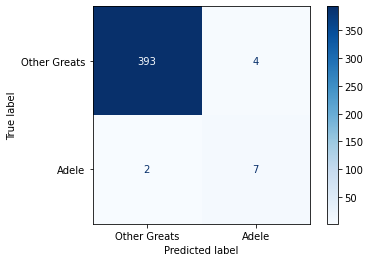

In [185]:
# Choose an artist
chosen_artist = input("Who is your favorite artist?  ").title()

# if chosen_artist in list(ARTISTS_df.artist):
if chosen_artist in list(ARTISTS_df['artist'].value_counts().keys())[:100]:
    print(f"Great, let's see how easy it is to classify a {chosen_artist} song!")
    analyze = True
else:
    print(f"Sorry, we don't have enough data about them! \nI guess Billboard doesn't consider {chosen_artist} to be one of the 100 greatest of all time...")
    analyze = False
    
if analyze:
    
    #Set up data
    ARTISTS_df['chosen'] = np.where(ARTISTS_df.artist == chosen_artist, 1, 0)

    # Assign X (data) and y (target)
    X = ARTISTS_df.drop(['song_id', 'song_name',
                         'artist_id', 'artist', 'artist popularity', 'artist followers', 'genre', 
                         'type', 'id', 'uri', 'track_href', 'analysis_url', 
                         'chosen'], axis=1)
#     X = X.drop(['pop', 'rap', 'hiphop', 'rock', 'rnb', 'country', 'mellow', 'edm', 'latin'], axis=1)

    y = ARTISTS_df['chosen']
    # print(X.shape, y.shape)
    
    # Name our negatives and positives
    target_names = ["Other Greats", chosen_artist]

    # Select random state
    rs = 42

    #Split data
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rs, stratify=y)

    from sklearn import tree
    clf = tree.DecisionTreeClassifier(class_weight = 'balanced')

    #train model
    clf = clf.fit(X_train, y_train)

    #test model
    print(f"Training Data Score: {clf.score(X_train, y_train)}")
    print(f"Testing Data Score: {clf.score(X_test, y_test)}\n")

    predictions = clf.predict(X_test)
    print(classification_report(y_test, predictions, target_names=target_names))

    plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, display_labels=target_names)
    plt.show()

    feature_names = X.columns
    sorted(zip(clf.feature_importances_, feature_names), reverse=True)[:10]

In [186]:
def color_false(x):
    if x.artist == chosen_artist:
        return ['background-color: mistyrose']*2
    else:
        return ['background-color: honeydew']*2
    
Results_df = pd.DataFrame({"prediction": predictions, "actual": y_test, "song_encoded": X_test['song_encoded']}).reset_index(drop=True)
False_df = Results_df.loc[((Results_df.prediction==1)&(Results_df.actual==0))|((Results_df.prediction==0)&(Results_df.actual==1)),:]
False_df.merge(ARTISTS_df, on='song_encoded')[['song_name', 'artist']].style.apply(color_false, axis=1).hide_index()

song_name,artist
Die For You,The Weeknd
I'll Be Waiting,Adele
Try Me,The Weeknd
"Me, Myself and I",Beyoncé
Rather Die Young,Beyoncé
Right As Rain,Adele
